# Ronchigram Testing

**Scott Prahl**

**Dec 2025**

## Introduction

This notebook shows output of the `lenstest.ronchi` library and compares it with published ronchigrams.

The surface shapes are all conics of revolution.  The conic constant $k$ defines the surface type.

    less than -1   = hyperboloids
    -1 to 0        = prolate spheroids
    0              = sphere
    greater than 0 = oblate spheroids
    infinite       = flat

In [1]:
%config InlineBackend.figure_format = 'retina'

import sys
import numpy as np
import matplotlib.pyplot as plt

if sys.platform == "emscripten":
    import piplite

    await piplite.install("lenstest")

from lenstest import ronchi
from lenstest.lenstest import draw_circle

## Ronchigrams of 300mm f/5 mirror with various surfaces

From <https://www.telescope-optics.net/ronchi_test.htm>

k=0.5 (oblate ellipsoid) to k=-1.5 (hyperboloid) for 4 lines/mm grating, and for given Ronchi grating locations inside (negative values) and outside of mirror's center of curvature.  Note how the number of intercepted lines decreases inside focus with undercorrection, and increases with overcorrection, the opposite being the case outside of focus. This is a consequence of the defocus between inner and outer mirror areas.

    Mirror Diameter = 300 mm
Radius of Curvature = 3000 mm
   Ronchi Frequency = 4 lp/mm
       Focal Length = 1500 mm
                 F# = 5.0


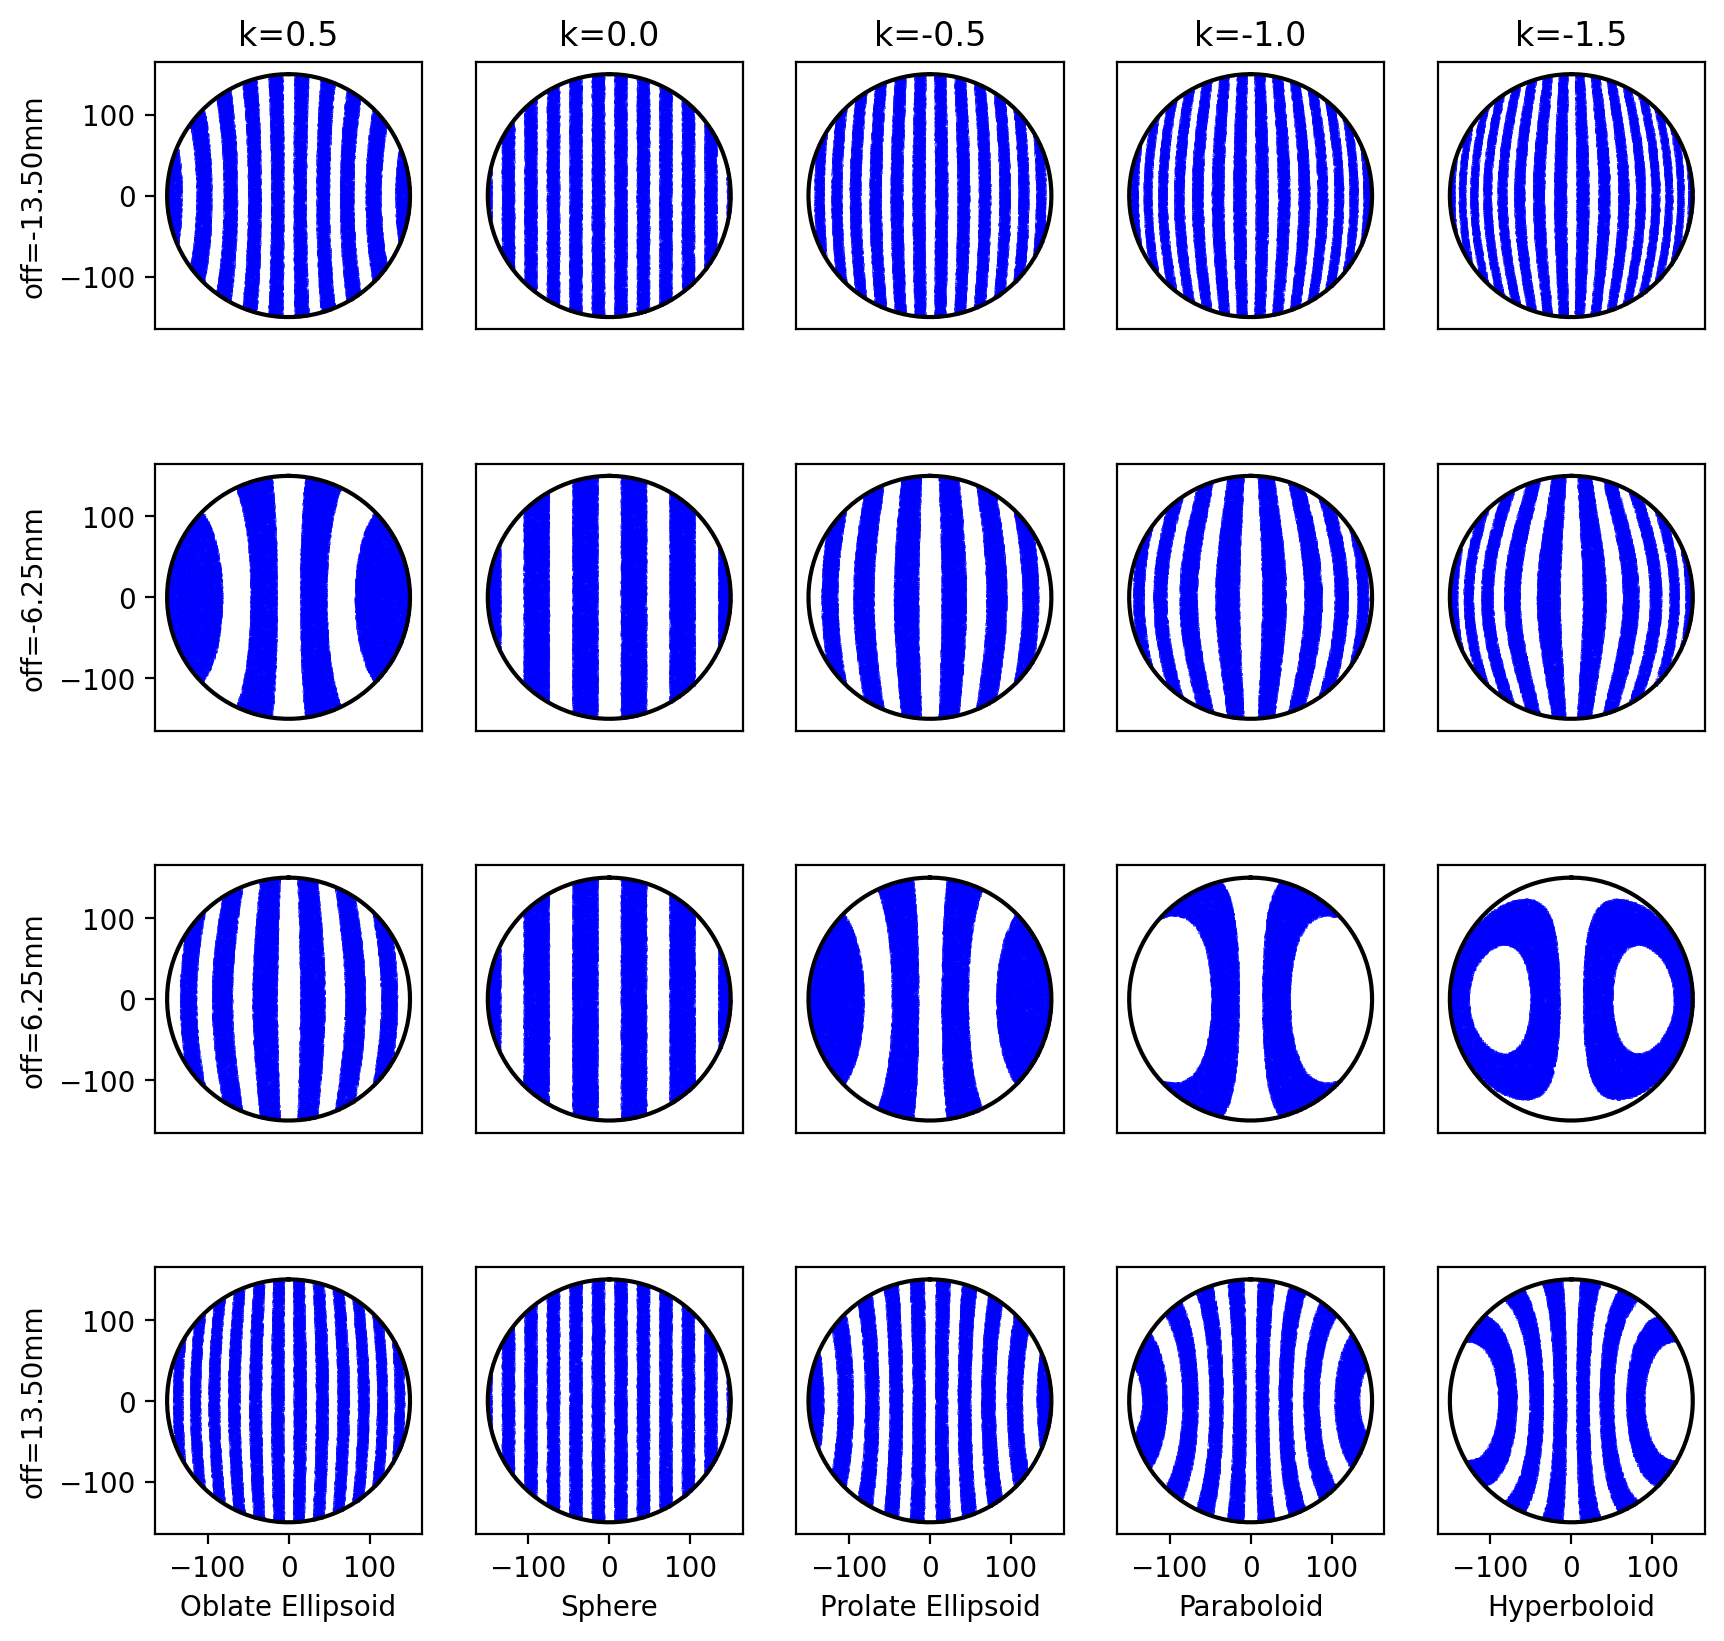

In [2]:
# 300 mm f/5 mirror, Ronchi grating 4 lp/mm

D = 300
f_number = 5
lpm = 4

focal_length = f_number * D
RoC = 2 * focal_length

print("    Mirror Diameter = %.0f mm" % D)
print("Radius of Curvature = %.0f mm" % RoC)
print("   Ronchi Frequency = %.0f lp/mm" % lpm)
# print("             offset = %.2f mm" % offset_from_focus)
print("       Focal Length = %.0f mm" % focal_length)
print("                 F# = %.1f" % f_number)


plt.subplots(4, 5, figsize=(10, 10))

conics = [0.5, 0.0, -0.5, -1, -1.5]
offsets = [-13.5, -6.25, 6.25, 13.5]
labels = ["Oblate Ellipsoid", "Sphere", "Prolate Ellipsoid", "Paraboloid", "Hyperboloid"]
for i, offset in enumerate(offsets):
    for j, conic in enumerate(conics):
        plt.subplot(4, 5, i * 5 + j + 1)
        x, y = ronchi.gram(D, RoC, lpm, offset, conic=conic)
        plt.plot(x, y, "o", markersize=0.1, color="blue")
        plt.gca().set_aspect("equal")
        plt.xlim(-D / 2 * 1.1, D / 2 * 1.1)
        plt.ylim(-D / 2 * 1.1, D / 2 * 1.1)
        if j == 0:
            plt.ylabel("off=%.2fmm" % offset)
        else:
            plt.yticks([])

        if i == 0:
            plt.title("k=%.1f" % conic)

        if i != 3:
            plt.xticks([])

        if i == 3:
            plt.xlabel(labels[j])

        draw_circle(D / 2)


plt.show()

Which is reasonably close to these

<img src="https://www.telescope-optics.net/images/Ronchi.PNG" />

## Comparison with Aguirre-Aguirre

The paper

R. Aguirre-Aguirre, et al., "Simulation Algorithm for Ronchigrams of Spherical and Aspherical Surfaces, with the Lateral Shear Interferometry Formalism," *Optical Review,* **20** (2013).

has a figures that can be matched

### Aguirre-Aguirre Spherical Surface

Section 3.1

    Mirror Diameter  128.00 mm
Radius of Curvature  498.50 mm
       Focal Length  249.25 mm
   Ronchi Frequency    6.35 lp/mm
                 F#    1.95
   conic constant K    0.00



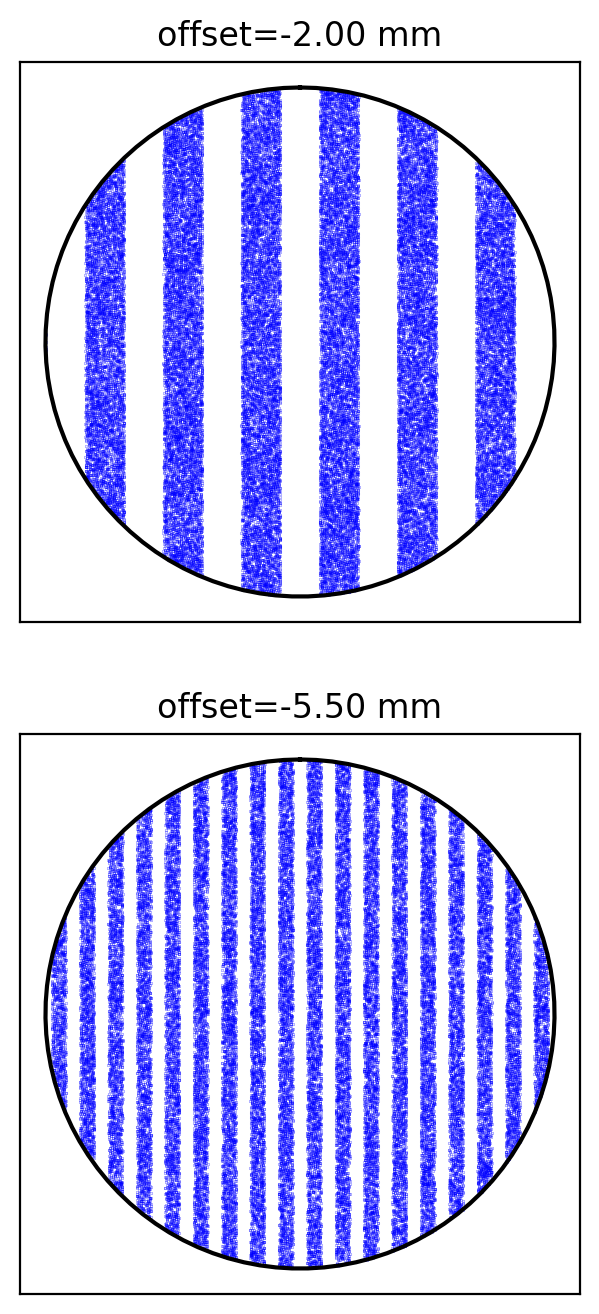

In [3]:
D = 128  # mm
lpm = 6.35  # lines per mm
RoC = 498.5  # mm
focal_length = RoC / 2
f_number = focal_length / D
k = 0
offsets = np.array([496.5, 493]) - RoC

print("    Mirror Diameter %7.2f mm" % D)
print("Radius of Curvature %7.2f mm" % RoC)
print("       Focal Length %7.2f mm" % focal_length)
print("   Ronchi Frequency %7.2f lp/mm" % lpm)
print("                 F# %7.2f" % f_number)
print("   conic constant K %7.2f" % k)
print()

plt.subplots(2, 1, figsize=(8, 8))
for i, offset in enumerate(offsets):
    plt.subplot(2, 1, i + 1)
    x, y = ronchi.gram(D, RoC, lpm, offset, k)
    plt.plot(x, y, "o", markersize=0.1, color="blue")
    plt.gca().set_aspect("equal")
    plt.xlim(-D / 2 * 1.1, D / 2 * 1.1)
    plt.ylim(-D / 2 * 1.1, D / 2 * 1.1)
    plt.title("offset=%.2f mm" % (offset))
    plt.xticks([])
    plt.yticks([])
    draw_circle(D / 2, color="black")
plt.show()

### Aguirre-Aguirre Paraboloid Surface

Section 3.2

    Mirror Diameter  205.00 mm
Radius of Curvature 2731.00 mm
       Focal Length 1365.50 mm
   Ronchi Frequency    6.35 lp/mm
                 F#    6.66
   conic constant K   -1.00



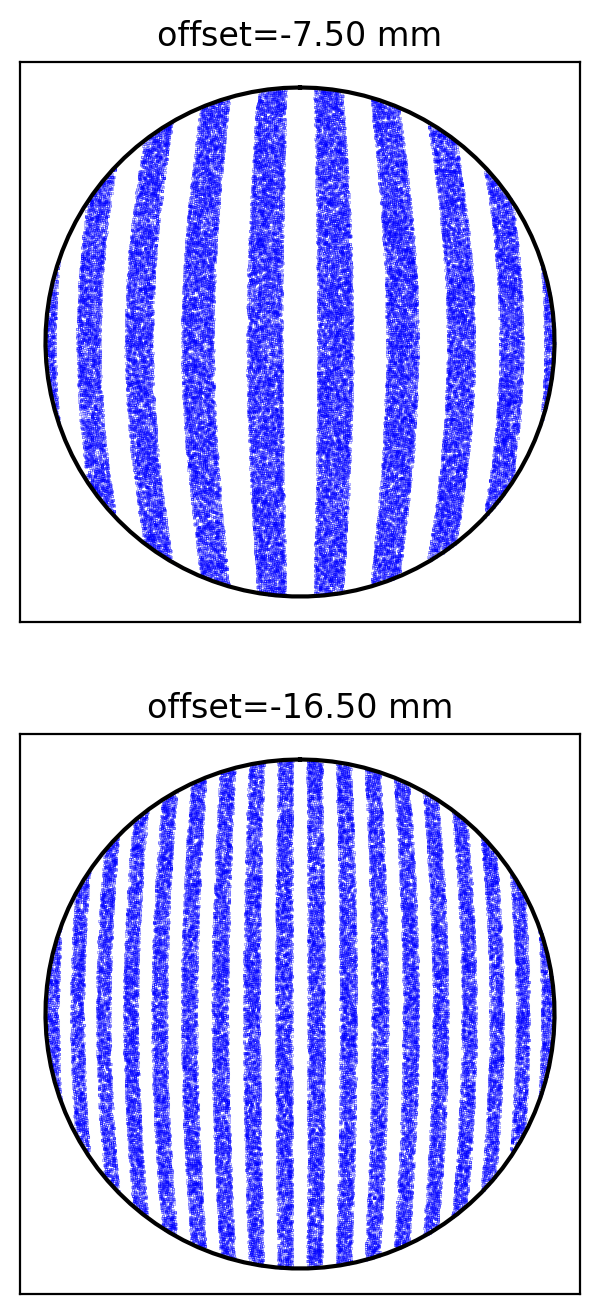

In [4]:
D = 205  # mm
lpm = 6.35  # lines per mm
RoC = 2731  # mm
k = -1  # paraboloid

offsets = np.array([2723.5, 2714.5]) - RoC
focal_length = RoC / 2
f_number = focal_length / D

print("    Mirror Diameter %7.2f mm" % D)
print("Radius of Curvature %7.2f mm" % RoC)
print("       Focal Length %7.2f mm" % focal_length)
print("   Ronchi Frequency %7.2f lp/mm" % lpm)
print("                 F# %7.2f" % f_number)
print("   conic constant K %7.2f" % k)
print()

plt.subplots(2, 1, figsize=(8, 8))
for i, offset in enumerate(offsets):
    plt.subplot(2, 1, i + 1)
    x, y = ronchi.gram(D, RoC, lpm, offset, k)
    plt.plot(x, y, "o", markersize=0.1, color="blue")
    plt.gca().set_aspect("equal")
    plt.xlim(-D / 2 * 1.1, D / 2 * 1.1)
    plt.ylim(-D / 2 * 1.1, D / 2 * 1.1)
    plt.title("offset=%.2f mm" % (offset))
    plt.xticks([])
    plt.yticks([])
    draw_circle(D / 2, color="black")
plt.show()

### Aguirre-Aguirre Hyperboloid Surface

Section 3.3

    Mirror Diameter   73.20 mm
Radius of Curvature  533.00 mm
       Focal Length  266.50 mm
   Ronchi Frequency    6.35 lp/mm
                 F#    3.64
   conic constant K   -3.65



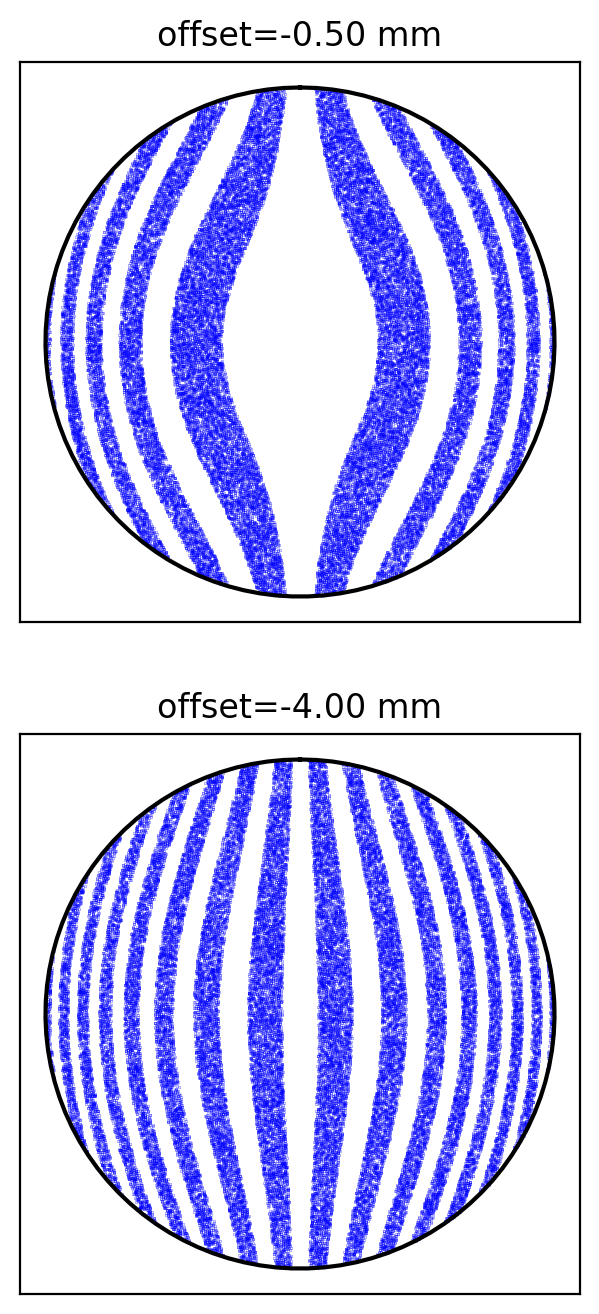

In [5]:
D = 73.2  # mm
RoC = 533  # mm
lpm = 6.35  # lines per mm
k = -3.65  # hyperboloid
offsets = np.array([532.5, 529.0]) - RoC  # mm

focal_length = RoC / 2
f_number = focal_length / D

print("    Mirror Diameter %7.2f mm" % D)
print("Radius of Curvature %7.2f mm" % RoC)
print("       Focal Length %7.2f mm" % focal_length)
print("   Ronchi Frequency %7.2f lp/mm" % lpm)
print("                 F# %7.2f" % f_number)
print("   conic constant K %7.2f" % k)
print()

plt.subplots(2, 1, figsize=(8, 8))
for i, offset in enumerate(offsets):
    plt.subplot(2, 1, i + 1)
    x, y = ronchi.gram(D, RoC, lpm, offset, k)
    plt.plot(x, y, "o", markersize=0.1, color="blue")
    plt.gca().set_aspect("equal")
    plt.xlim(-D / 2 * 1.1, D / 2 * 1.1)
    plt.ylim(-D / 2 * 1.1, D / 2 * 1.1)
    plt.title("offset=%.2f mm" % (offset))
    plt.xticks([])
    plt.yticks([])
    draw_circle(D / 2, color="black")
plt.show()

    Mirror Diameter  203.20 mm
Radius of Curvature 2844.80 mm
       Focal Length 1422.40 mm
   Ronchi Frequency   10.47 lp/mm
                 F#    7.00
   conic constant K   -2.00



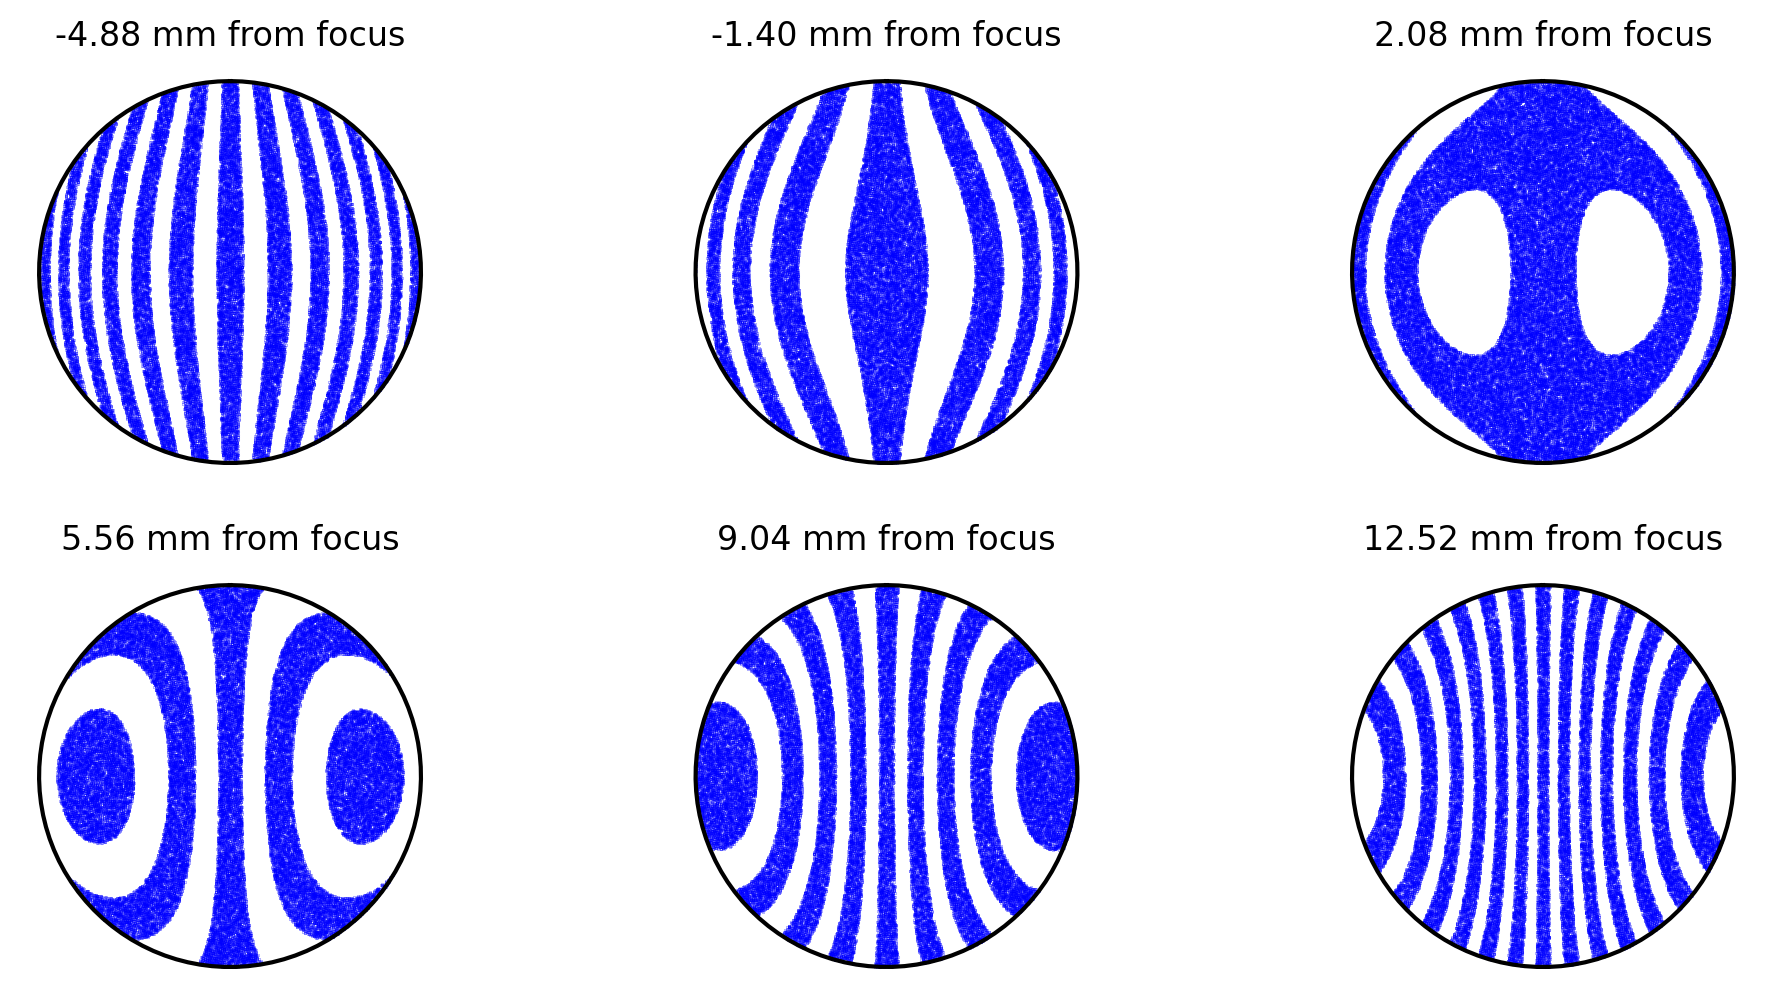

In [6]:
D = 8 * 25.4  # mm
f_number = 7
lpm = 133 / 25.4 * 2  # lines per mm
k = -2  # hyperboloid
offsets = np.array([-192, -55, 82, 219, 356, 493]) * 25.4 / 1000  # mm

focal_length = f_number * D
RoC = 2 * focal_length

print("    Mirror Diameter %7.2f mm" % D)
print("Radius of Curvature %7.2f mm" % RoC)
print("       Focal Length %7.2f mm" % focal_length)
print("   Ronchi Frequency %7.2f lp/mm" % lpm)
print("                 F# %7.2f" % f_number)
print("   conic constant K %7.2f" % k)
print()

plt.subplots(2, 3, figsize=(12, 6))
for i, offset in enumerate(offsets):
    plt.subplot(2, 3, i + 1)
    x, y = ronchi.gram(D, RoC, lpm, offset, k, invert=True)
    plt.plot(x, y, "o", markersize=0.1, color="blue")
    plt.gca().axis(False)
    plt.gca().set_aspect("equal")
    plt.title("%.2f mm from focus" % (offset))
    draw_circle(D / 2, color="black")
plt.show()

Which matches

<img src="http://www.atm-workshop.com/assets/img/ronchi-test-10.gif" width="65%" />

## Plots of Ronchigram and Grating

One experimental challenge is getting the grating close enough, but not too close to the focus.

This shows how the mirror surface appears, as will as the size of the beam on the Ronchi ruling.

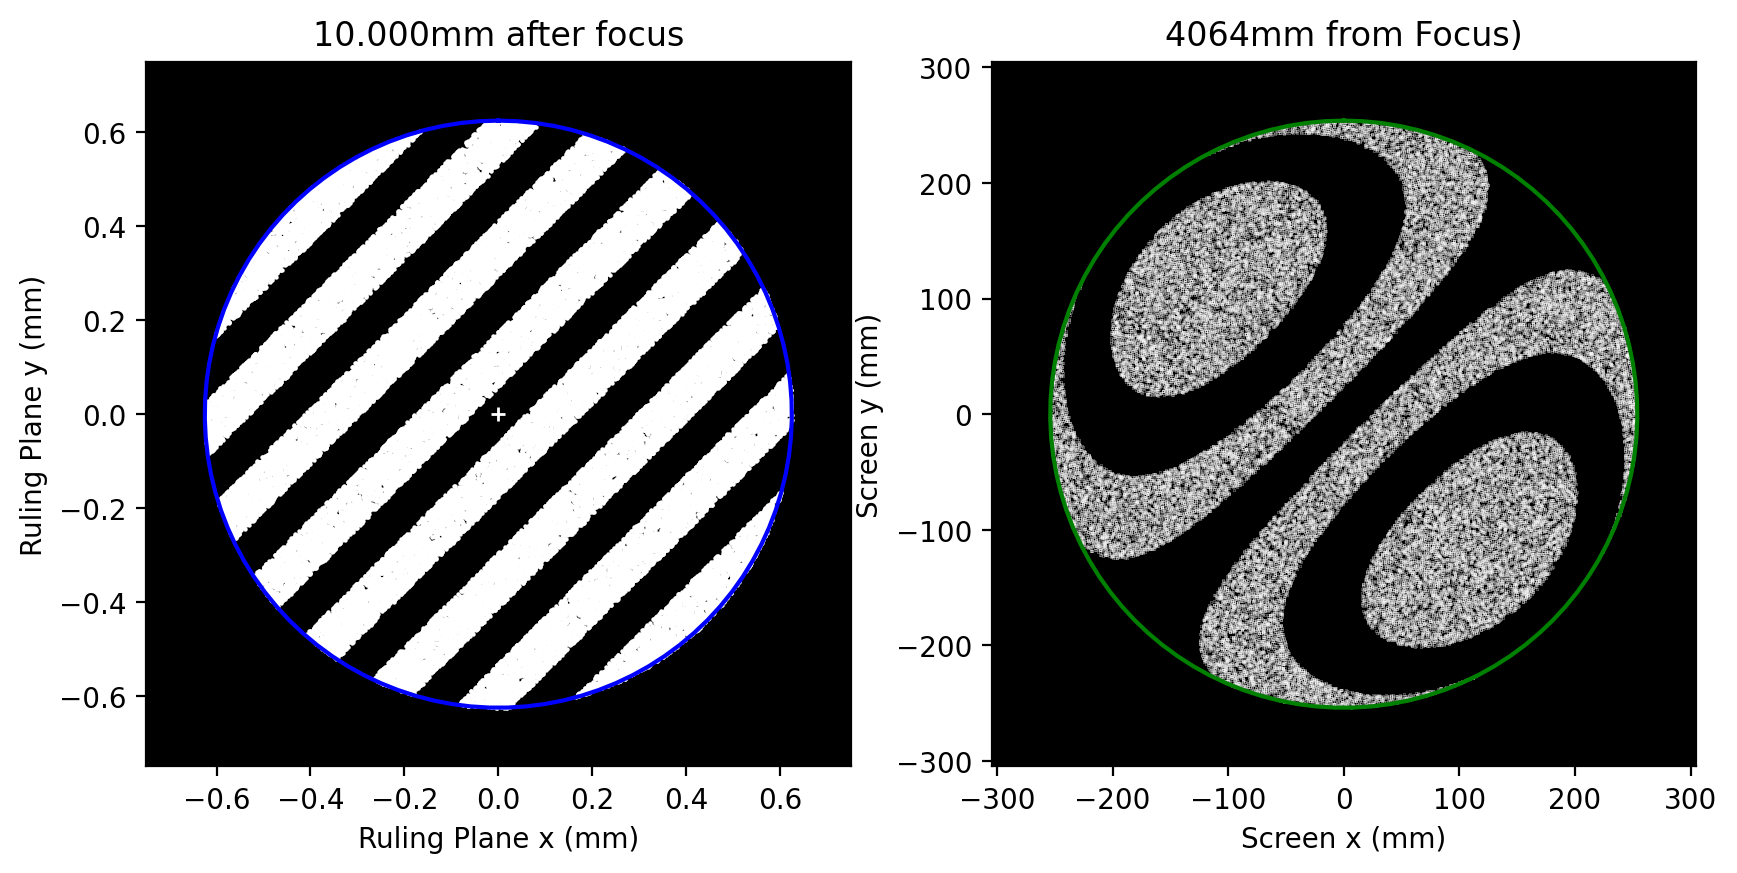

In [7]:
D = 20 * 25.4
RoC = 160 * 25.4
lp_per_mm = 3
z_offset = 10
conic = -1
phi = np.radians(-45)

ronchi.plot_ruling_and_screen(D, RoC, lp_per_mm, z_offset, conic, phi=phi)
plt.show()